# Batch UCB


In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math
import json

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from sklearn_extra.cluster import KMedoids

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import *
from codes.kernels_for_GPK import *
from codes.batch_ucb import *

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

/home/admin-u6015325/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Path = '../../data/firstRound_Microplate_normTrue_formatSeq_logTrue.csv'

known_df = pd.read_csv(Path)
known_df.head()

,Unnamed: 0,Name,Group,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,AVERAGE,STD
0,0,RBS_1by1_0,reference,TTTAAGAAGGAGATATACAT,AGGAGA,1.616261,1.814182,1.760954,2.186207,2.028863,1.831982,1.881293,0.225819
1,1,RBS_1by1_1,bps_noncore,CTTAAGAAGGAGATATACAT,AGGAGA,1.166174,1.337018,1.417248,1.493800,1.713526,1.644568,1.425553,0.201725
2,2,RBS_1by1_2,bps_noncore,GTTAAGAAGGAGATATACAT,AGGAGA,0.604551,0.751384,0.851987,0.514929,0.577299,0.795227,0.660030,0.137994
3,3,RBS_1by1_3,bps_noncore,ATTAAGAAGGAGATATACAT,AGGAGA,1.221264,1.466278,1.270212,1.341040,1.395030,1.175433,1.338765,0.097386
4,4,RBS_1by1_4,bps_noncore,TCTAAGAAGGAGATATACAT,AGGAGA,1.160566,1.579025,1.171829,1.590670,1.411255,1.756862,1.382669,0.210012


In [3]:
rec_size = 90

## Top n recommendations

return seuqneces with top n ucb score. 

In [4]:
top_n = Top_n_ucb(known_df, kernel_name='WD_Kernel_Shift', l=6, s=1,
                 embedding='label', alpha=0.1, rec_size=rec_size, beta=1)

In [5]:
top_n_rec_df = top_n.run_experiment()

X train shape:  (1055, 20)
X test shape:  (3961, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg


## GP-BUCB

Desautels et al. 2014 Algorithm 2
http://jmlr.org/papers/volume15/desautels14a/desautels14a.pdf

In [6]:
gpbucb = GP_BUCB(known_df, kernel_name='WD_Kernel_Shift', l=6, s=1,
                embedding='label', alpha=0.1, rec_size=rec_size, beta=1)

In [7]:
gpbucb_rec_df = gpbucb.run_experiment()

X train shape:  (1055, 20)
X test shape:  (3961, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
1074    898      NaN   NaN  NaN  TTTAAGATGCTACTATACAT  TGCTAC   NaN   NaN   
1885   1709      NaN   NaN  NaN  TTTAAGATGCTATTATACAT  TGCTAT   NaN   NaN   
547     371      NaN   NaN  NaN  TTTAAGATGCTGGTATACAT  TGCTGG   NaN   NaN   
3504   3328      NaN   NaN  NaN  TTTAAGAGGCTACTATACAT  GGCTAC   NaN   NaN   
794     618      NaN   NaN  NaN  TTTAAGACGCTACTATACAT  CGCTAC   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
1074   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.631317   
1885   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.572750   
547    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.458624   
3504   NaN   NaN   NaN   NaN  NaN         NaN       Tes

gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
3001   2825      NaN   NaN  NaN  TTTAAGATGCGGTTATACAT  TGCGGT   NaN   NaN   
3239   3063      NaN   NaN  NaN  TTTAAGATGCTGTTATACAT  TGCTGT   NaN   NaN   
1757   1581      NaN   NaN  NaN  TTTAAGAGCTCCGTATACAT  GCTCCG   NaN   NaN   
1186   1010      NaN   NaN  NaN  TTTAAGAGGGGGTTATACAT  GGGGGT   NaN   NaN   
2608   2432      NaN   NaN  NaN  TTTAAGATGCTCGTATACAT  TGCTCG   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
3001   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.298998   
3239   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.384169   
1757   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.268667   
1186   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.529419   
2608   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.323620   

      pred std       ucb  
30

X train shape:  (1068, 20)
X test shape:  (3948, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
2608   2432      NaN   NaN  NaN  TTTAAGATGCTCGTATACAT  TGCTCG   NaN   NaN   
1333   1157      NaN   NaN  NaN  TTTAAGAGCTACGTATACAT  GCTACG   NaN   NaN   
2368   2192      NaN   NaN  NaN  TTTAAGATTCTACTATACAT  TTCTAC   NaN   NaN   
2606   2430      NaN   NaN  NaN  TTTAAGAGCGACGTATACAT  GCGACG   NaN   NaN   
190      14      NaN   NaN  NaN  TTTAAGATTCTATTATACAT  TTCTAT   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
2608   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.323620   
1333   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.300569   
2368   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.349936   
2606   NaN   NaN   NaN   NaN  NaN         NaN       Tes

gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
338     162      NaN   NaN  NaN  TTTAAGACGCTATTATACAT  CGCTAT   NaN   NaN   
1494   1318      NaN   NaN  NaN  TTTAAGAGGCTGGTATACAT  GGCTGG   NaN   NaN   
1465   1289      NaN   NaN  NaN  TTTAAGATGGGGTTATACAT  TGGGGT   NaN   NaN   
4028   3852      NaN   NaN  NaN  TTTAAGATGCTTATATACAT  TGCTTA   NaN   NaN   
2606   2430      NaN   NaN  NaN  TTTAAGAGCGACGTATACAT  GCGACG   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
338    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.335351   
1494   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.272719   
1465   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.378622   
4028   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.254202   
2606   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.170957   

      pred std       ucb  
33

X train shape:  (1081, 20)
X test shape:  (3935, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
190      14      NaN   NaN  NaN  TTTAAGATTCTATTATACAT  TTCTAT   NaN   NaN   
3496   3320      NaN   NaN  NaN  TTTAAGAGCGTGGTATACAT  GCGTGG   NaN   NaN   
689     513      NaN   NaN  NaN  TTTAAGAGTCTATTATACAT  GTCTAT   NaN   NaN   
831     655      NaN   NaN  NaN  TTTAAGAGCTAATTATACAT  GCTAAT   NaN   NaN   
634     458      NaN   NaN  NaN  TTTAAGACTCTGGTATACAT  CTCTGG   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
190    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.299357   
3496   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.116890   
689    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.263555   
831    NaN   NaN   NaN   NaN  NaN         NaN       Tes

finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
2022   1846      NaN   NaN  NaN  TTTAAGAGCTTACTATACAT  GCTTAC   NaN   NaN   
1697   1521      NaN   NaN  NaN  TTTAAGAATCTACTATACAT  ATCTAC   NaN   NaN   
3162   2986      NaN   NaN  NaN  TTTAAGACGCTGGTATACAT  CGCTGG   NaN   NaN   
984     808      NaN   NaN  NaN  TTTAAGAAACTACTATACAT  AACTAC   NaN   NaN   
424     248      NaN   NaN  NaN  TTTAAGAGCTTGGTATACAT  GCTTGG   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
2022   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.103566   
1697   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.231992   
3162   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.223735   
984    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.098541   
424    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.083998   

      pred std       ucb  
2022  0.722401

X train shape:  (1094, 20)
X test shape:  (3922, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
1947   1771      NaN   NaN  NaN  TTTAAGAGGCTGTTATACAT  GGCTGT   NaN   NaN   
428     252      NaN   NaN  NaN  TTTAAGAGCGTACTATACAT  GCGTAC   NaN   NaN   
3816   3640      NaN   NaN  NaN  TTTAAGAGCTCATTATACAT  GCTCAT   NaN   NaN   
3671   3495      NaN   NaN  NaN  TTTAAGACTCTCGTATACAT  CTCTCG   NaN   NaN   
424     248      NaN   NaN  NaN  TTTAAGAGCTTGGTATACAT  GCTTGG   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
1947   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.196147   
428    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.119556   
3816   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.074968   
3671   NaN   NaN   NaN   NaN  NaN         NaN       Tes

finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
324     148      NaN   NaN  NaN  TTTAAGATGGTATTATACAT  TGGTAT   NaN   NaN   
1594   1418      NaN   NaN  NaN  TTTAAGATTCTGGTATACAT  TTCTGG   NaN   NaN   
1734   1558      NaN   NaN  NaN  TTTAAGATGCGGGTATACAT  TGCGGG   NaN   NaN   
3406   3230      NaN   NaN  NaN  TTTAAGAGCGAACTATACAT  GCGAAC   NaN   NaN   
3951   3775      NaN   NaN  NaN  TTTAAGATGCAACTATACAT  TGCAAC   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
324    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.137433   
1594   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.176353   
1734   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.146502   
3406   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.067817   
3951   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.057306   

      pred std       ucb  
324   0.624827

X train shape:  (1107, 20)
X test shape:  (3909, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
3951   3775      NaN   NaN  NaN  TTTAAGATGCAACTATACAT  TGCAAC   NaN   NaN   
1334   1158      NaN   NaN  NaN  TTTAAGATAGTGGTATACAT  TAGTGG   NaN   NaN   
3540   3364      NaN   NaN  NaN  TTTAAGATGCGAGTATACAT  TGCGAG   NaN   NaN   
2045   1869      NaN   NaN  NaN  TTTAAGAGCTAACTATACAT  GCTAAC   NaN   NaN   
2085   1909      NaN   NaN  NaN  TTTAAGATGGTGGTATACAT  TGGTGG   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
3951   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.057306   
1334   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.076961   
3540   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.097609   
2045   NaN   NaN   NaN   NaN  NaN         NaN       Tes

gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
835     659      NaN   NaN  NaN  TTTAAGACGCGGTTATACAT  CGCGGT   NaN   NaN   
2183   2007      NaN   NaN  NaN  TTTAAGAGGCGGTTATACAT  GGCGGT   NaN   NaN   
1596   1420      NaN   NaN  NaN  TTTAAGAGGCTGCTATACAT  GGCTGC   NaN   NaN   
1864   1688      NaN   NaN  NaN  TTTAAGACTCTGTTATACAT  CTCTGT   NaN   NaN   
1385   1209      NaN   NaN  NaN  TTTAAGAACGAATTATACAT  ACGAAT   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
835    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.063028   
2183   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.071410   
1596   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.155975   
1864   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.142242   
1385   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.106023   

      pred std       ucb  
83

X train shape:  (1120, 20)
X test shape:  (3896, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
2865   2689      NaN   NaN  NaN  TTTAAGAGCTGGTTATACAT  GCTGGT   NaN   NaN   
696     520      NaN   NaN  NaN  TTTAAGAGGGGGGTATACAT  GGGGGG   NaN   NaN   
2703   2527      NaN   NaN  NaN  TTTAAGAGGGGACTATACAT  GGGGAC   NaN   NaN   
3465   3289      NaN   NaN  NaN  TTTAAGATGCACGTATACAT  TGCACG   NaN   NaN   
3697   3521      NaN   NaN  NaN  TTTAAGACGCTGTTATACAT  CGCTGT   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
2865   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.005069   
696    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.212611   
2703   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.127364   
3465   NaN   NaN   NaN   NaN  NaN         NaN       Tes

gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
3298   3122      NaN   NaN  NaN  TTTAAGATGCGCGTATACAT  TGCGCG   NaN   NaN   
2444   2268      NaN   NaN  NaN  TTTAAGAGCATACTATACAT  GCATAC   NaN   NaN   
961     785      NaN   NaN  NaN  TTTAAGATTCTCGTATACAT  TTCTCG   NaN   NaN   
2743   2567      NaN   NaN  NaN  TTTAAGAGCGTATTATACAT  GCGTAT   NaN   NaN   
2183   2007      NaN   NaN  NaN  TTTAAGAGGCGGTTATACAT  GGCGGT   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
3298   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.019518   
2444   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   0.973345   
961    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.112434   
2743   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.084785   
2183   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.071410   

      pred std       ucb  
32

X train shape:  (1133, 20)
X test shape:  (3883, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
1064    888      NaN   NaN  NaN  TTTAAGATGCAAGTATACAT  TGCAAG   NaN   NaN   
3339   3163      NaN   NaN  NaN  TTTAAGAGCGAAGTATACAT  GCGAAG   NaN   NaN   
1133    957      NaN   NaN  NaN  TTTAAGATAGTACTATACAT  TAGTAC   NaN   NaN   
3859   3683      NaN   NaN  NaN  TTTAAGAGGTAATTATACAT  GGTAAT   NaN   NaN   
1742   1566      NaN   NaN  NaN  TTTAAGAGCTTATTATACAT  GCTTAT   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
1064   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.009769   
3339   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.006974   
1133   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.066852   
3859   NaN   NaN   NaN   NaN  NaN         NaN       Tes

gp_reg pred
finish reg
sorted_batch_df
      index  AVERAGE Group Name                   RBS    RBS6  Rep1  Rep2  \
1499   1323      NaN   NaN  NaN  TTTAAGAGCTCAGTATACAT  GCTCAG   NaN   NaN   
529     353      NaN   NaN  NaN  TTTAAGACGGGGTTATACAT  CGGGGT   NaN   NaN   
3537   3361      NaN   NaN  NaN  TTTAAGAGCTCTATATACAT  GCTCTA   NaN   NaN   
3339   3163      NaN   NaN  NaN  TTTAAGAGCGAAGTATACAT  GCGAAG   NaN   NaN   
1810   1634      NaN   NaN  NaN  TTTAAGAGGCTTATATACAT  GGCTTA   NaN   NaN   

      Rep3  Rep4  Rep5  Rep6  STD  Unnamed: 0 train_test  label  pred mean  \
1499   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   0.963058   
529    NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.168403   
3537   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   0.954289   
3339   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.006974   
1810   NaN   NaN   NaN   NaN  NaN         NaN       Test    NaN   1.067552   

      pred std       ucb  
14

## Recommendation results

In [8]:
gpbucb_rec_df

,index,AVERAGE,Group,Name,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,STD,Unnamed: 0,train_test,label,pred mean,pred std,ucb
0,898,NaN,NaN,NaN,TTTAAGATGCTACTATACAT,TGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.631317,0.804478,2.435795
1,1709,NaN,NaN,NaN,TTTAAGATGCTATTATACAT,TGCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.572750,0.684264,2.257014
2,371,NaN,NaN,NaN,TTTAAGATGCTGGTATACAT,TGCTGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.458624,0.754993,2.213616
3,3328,NaN,NaN,NaN,TTTAAGAGGCTACTATACAT,GGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.443215,0.714985,2.158200
4,618,NaN,NaN,NaN,TTTAAGACGCTACTATACAT,CGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.394639,0.679328,2.073967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,353,NaN,NaN,NaN,TTTAAGACGGGGTTATACAT,CGGGGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.168403,0.473332,1.641735
86,1634,NaN,NaN,NaN,TTTAAGAGGCTTATATACAT,GGCTTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.067552,0.570000,1.637551
87,978,NaN,NaN,NaN,TTTAAGATGCTCCTATACAT,TGCTCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.037777,0.598922,1.636698
88,3163,NaN,NaN,NaN,TTTAAGAGCGAAGTATACAT,GCGAAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.006974,0.628689,1.635663


In [9]:
top_n_rec_df

,index,AVERAGE,Group,Name,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,STD,Unnamed: 0,train_test,label,pred mean,pred std,ucb
1074,898,NaN,NaN,NaN,TTTAAGATGCTACTATACAT,TGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.631317,0.804478,2.435795
1885,1709,NaN,NaN,NaN,TTTAAGATGCTATTATACAT,TGCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.572750,0.797754,2.370505
547,371,NaN,NaN,NaN,TTTAAGATGCTGGTATACAT,TGCTGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.458624,0.825690,2.284314
3504,3328,NaN,NaN,NaN,TTTAAGAGGCTACTATACAT,GGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.443215,0.794618,2.237833
794,618,NaN,NaN,NaN,TTTAAGACGCTACTATACAT,CGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.394639,0.798577,2.193216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,915,NaN,NaN,NaN,TTTAAGAGTCTGCTATACAT,GTCTGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.020509,0.773430,1.793938
2299,2123,NaN,NaN,NaN,TTTAAGACTCTGCTATACAT,CTCTGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.102147,0.689059,1.791206
513,337,NaN,NaN,NaN,TTTAAGATTCTGCTATACAT,TTCTGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.059733,0.731376,1.791108
2008,1832,NaN,NaN,NaN,TTTAAGATGCTAATATACAT,TGCTAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.988763,0.800421,1.789184


In [10]:
top_n_rec_df.index

Int64Index([1074, 1885,  547, 3504,  794, 3239, 1073, 3620,  338, 2608, 2494,
            3858, 1494, 2368, 3001, 3162,  689, 4028, 1713,  190, 1757, 1519,
            1186, 1928, 2606, 1333, 1947, 1697, 2667,  634, 2426, 1551, 1594,
            3496, 1596, 3697, 1465, 3147, 2869,  879,  831,  428, 2922, 1734,
            2809, 1224, 3406,  783,  984, 2956, 3951,  424, 3540, 2743, 2422,
             829, 2022, 1810,  324, 3816, 2891, 2183, 2085,  835, 1385, 3325,
            3465,  378, 3339, 2138, 1064, 3106,  789,  961, 3671,  715, 1864,
            2045, 1334, 1154, 3298, 2195, 1742, 1671, 1656, 1091, 2299,  513,
            2008, 1024],
           dtype='int64')

### Similarity between recommendations

characterized by the same kernel used for prediction.

init kernel
init kernel
init kernel


Text(0.5, 1.0, 'GP_BUCB hist')

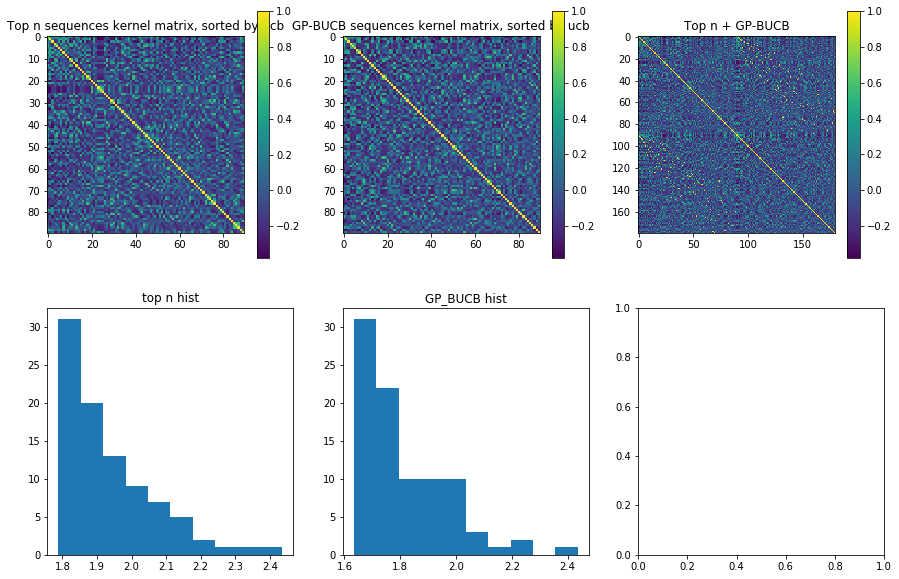

In [11]:
num_rows = 2
num_cols = 3

wd_kernel = WD_Shift_Kernel
fig,a = plt.subplots(num_rows, num_cols, figsize = (15,10))

wd_kernel.INIT_FLAG = False
im = a[0][0].imshow(wd_kernel(l=6, features = np.asarray(top_n_rec_df['RBS'])).kernel_all_normalised, cmap = 'viridis')
fig.colorbar(im, ax =a[0][0])
a[0][0].set_title('Top n sequences kernel matrix, sorted by ucb')

wd_kernel.INIT_FLAG = False
im = a[0][1].imshow(wd_kernel(l=6, features = np.asarray(gpbucb_rec_df['RBS'])).kernel_all_normalised, cmap = 'viridis')
fig.colorbar(im, ax =a[0][1])
a[0][1].set_title('GP-BUCB sequences kernel matrix, sorted by ucb')

wd_kernel.INIT_FLAG = False
all_features = np.concatenate((np.asarray(top_n_rec_df['RBS']), np.asarray(gpbucb_rec_df['RBS'])), axis = 0)
im = a[0][2].imshow(wd_kernel(l=6, features = all_features).kernel_all_normalised, cmap = 'viridis')
fig.colorbar(im, ax =a[0][2])
a[0][2].set_title('Top n + GP-BUCB')

im = a[1][0].hist(top_n_rec_df['ucb'])
a[1][0].set_title('top n hist')

im = a[1][1].hist(gpbucb_rec_df['ucb'])
a[1][1].set_title('GP_BUCB hist')

# im = a[1][2].hist(gpbucb_rec_df['ucb'])
# a[1][2].set_title('GP_BUCB hist')

In [12]:
common_rec = set(top_n_rec_df['RBS']).intersection(set(gpbucb_rec_df['RBS']))
print('Number of intersection of recommendations: ', len(common_rec))

Number of intersection of recommendations:  79


In [13]:
with pd.ExcelWriter('batch_ucb.xlsx') as writer:
    top_n_rec_df.to_excel(writer, sheet_name = 'top_n')
    gpbucb_rec_df.to_excel(writer, sheet_name = 'gpbucb')